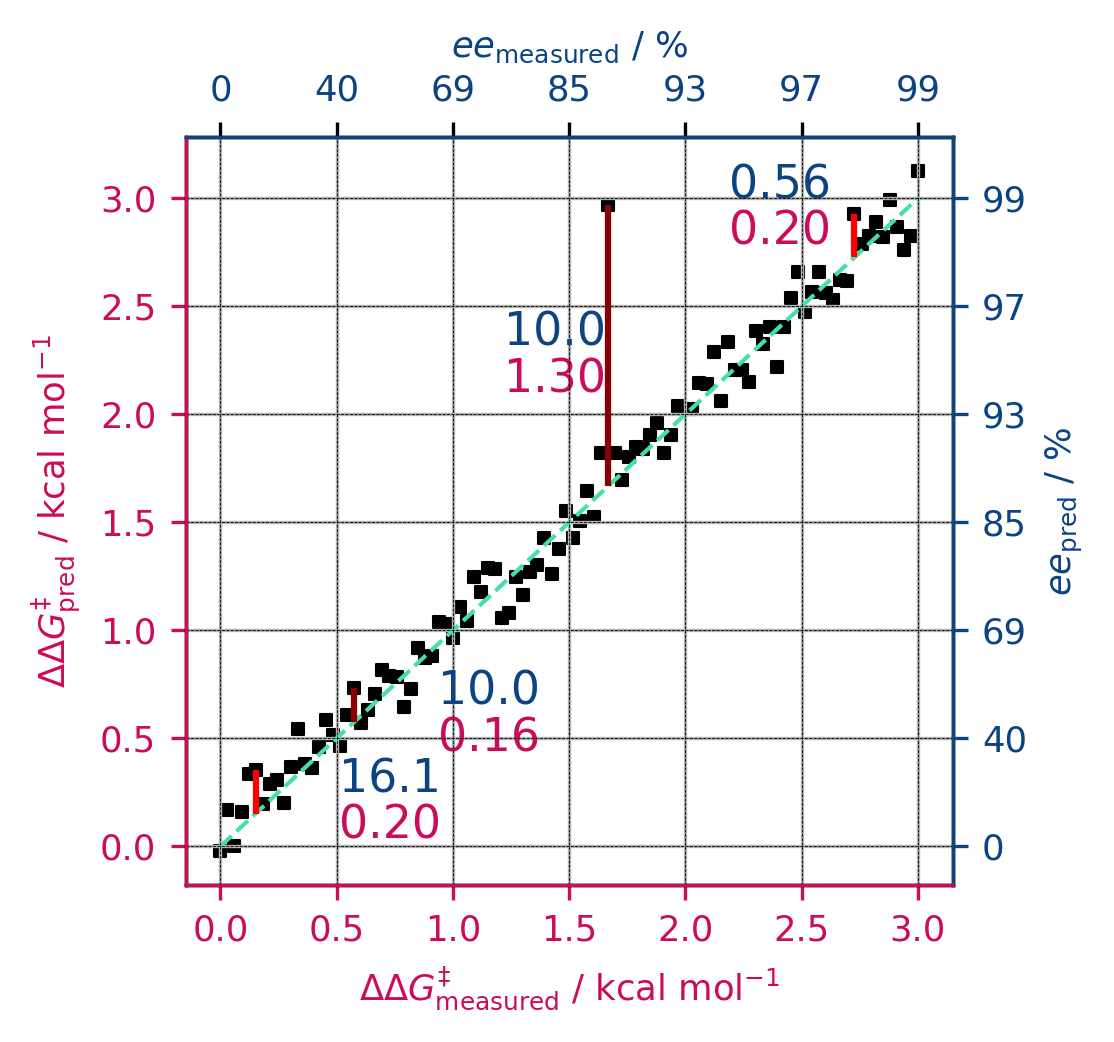

In [12]:
from calc import calc_ee, calc_ddg
import matplotlib.pyplot as plt
import numpy as np

def tick_function(X_ddg):
    X_ee = [calc_ee(ddg, T) for ddg in X_ddg]
    return([f"{i:.0f}" for i in X_ee])

gensch_palette = ['#0C4383',
                '#22A0B6',
                '#46E0A6',
                '#7B1346',
                '#CB0C59']
fontsize = 8.5
fontsize_error = 11
T = 298.15
x_offset = 0.0
y_offset = 0
plt.rcParams['font.size'] = 8.5
y_train = np.linspace(0, 3, 100)
# train points + added noise

# mean standard deviation of 0.3 kcal/mol

# to make distinct regions to find index in a low and high ddg range
noise1 = np.random.normal(0, 0.1, 5)
# same ddg error of 0.2 kcal/mol
noise2 = np.array([0.2]) # index 5 
noise3 = np.random.normal(0, 0.1, 84) # now at 90
noise4 = noise2 # index 90
noise5 = np.random.normal(0, 0.1, 9) # now at 100

noise = np.concatenate([noise1,noise2,noise3,noise4,noise5])

y_train_pred = y_train + noise

ee_error = 10 #% ee

# get ddg of value at index 9
ddg_true = y_train[19]

# calc it to ee
ee_true = calc_ee(ddg_true, T)
ee_pred =  ee_true + ee_error
ddg_pred = calc_ddg(ee_pred, T)
noise_index_9 = ddg_pred - ddg_true

# get ddg of value at index 85
ddg_true = y_train[55]

# calc it to ee
ee_true = calc_ee(ddg_true, T)

ee_pred =  ee_true + ee_error
ddg_pred = calc_ddg(ee_pred, T)
noise_index_80 = ddg_pred - ddg_true

noise[19] = noise_index_9
noise[55] = noise_index_80

# update y_train_pred
y_train_pred = y_train + noise

random_index = 5
# Get the corresponding data point and noise value
data_point = y_train[random_index]
pred_point = y_train_pred[random_index]
noise_value = noise[random_index]

random_index_2 = 90
# Get the corresponding data point and noise value
data_point_2 = y_train[random_index_2]
pred_point_2 = y_train_pred[random_index_2]
noise_value_2 = noise[random_index_2]

fig = plt.figure(figsize=(3.3,3.3), dpi=300)
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

scatter = ax1.scatter(y_train,y_train_pred,c='black',marker="s", s=8.5)
scatter.set_linewidth(0.5)
ax1.plot([0,3],[0,3],c=gensch_palette[2],linestyle="--", linewidth=1)
ax1.set_xbound([0,3])
ax1.set_ybound([0,3])

ax1Ticks = ax1.get_xticks()
ax2Ticks = ax1Ticks


# ERROR ONE
# Draw a red vertical line from the diagonal to this data point
ax1.vlines(data_point, data_point, pred_point, colors=['red'])

# Annotate the error between the point and the diagonal
ax1.annotate(rf'{abs(noise_value):.2f}',
             (data_point, (data_point + pred_point) / 2),
             textcoords="offset points", fontsize=fontsize_error, xytext=(x_offset + 20, y_offset - (fontsize_error + 0.2)),
             ha='left', color=gensch_palette[4])

# Calculate the error in the second axis (the ee axis)

ee_noise = calc_ee(data_point + noise_value, T)
ee_point = calc_ee(data_point, T)
ee_error = ee_point - ee_noise
# Annotate the error in the ee axis
ax2.annotate(rf'{abs(ee_error):.1f}',
             (data_point, (data_point + pred_point) / 2),
             textcoords="offset points",  fontsize=fontsize_error, xytext=(x_offset + 20, y_offset),
             ha='left', color=gensch_palette[0])

# ERROR TWO
# Draw a red vertical line from the diagonal to this data point
ax1.vlines(data_point_2, data_point_2, pred_point_2, colors=['red'])

# Annotate the error between the point and the diagonal
ax1.annotate(rf'{abs(noise_value_2):.2f}',
             (data_point_2, (data_point_2 + pred_point_2) / 2),
             textcoords="offset points",  fontsize=fontsize_error, xytext=(x_offset -30, y_offset + 9 - (fontsize_error + 0.2)),
             ha='left', color=gensch_palette[4])

# Calculate the error in the second axis (the ee axis)
ee_noise_2 = calc_ee(data_point_2 + noise_value_2, T)
ee_point_2 = calc_ee(data_point_2, T)
ee_error_2 = ee_point_2 - ee_noise_2

# Annotate the error in the ee axis
ax2.annotate(rf'{abs(ee_error_2):.2f}',
             (data_point_2, (data_point_2 + pred_point_2) / 2),
             textcoords="offset points",  fontsize=fontsize_error, xytext=(x_offset - 30, y_offset + 9),
             ha='left', color=gensch_palette[0])

# const ee errors 
random_index = 19
# Get the corresponding data point and noise value
data_point = y_train[random_index]
pred_point = y_train_pred[random_index]
noise_value = noise[random_index]


random_index_2 = 55
# Get the corresponding data point and noise value
data_point_2 = y_train[random_index_2]
pred_point_2 = y_train_pred[random_index_2]
noise_value_2 = noise[random_index_2]

# ERROR ONE
# Draw a red vertical line from the diagonal to this data point
ax1.vlines(data_point, data_point, pred_point, colors=['darkred'])

# Annotate the error between the point and the diagonal
ax1.annotate(rf'{abs(noise_value):.2f}',
             (data_point, (data_point + pred_point) / 2),
             textcoords="offset points",  fontsize=fontsize_error, xytext=(x_offset + 20, y_offset  - (fontsize_error + 0.2)),
             ha='left', color=gensch_palette[4])

# Calculate the error in the second axis (the ee axis)

ee_noise = calc_ee(data_point + noise_value, T)
ee_point = calc_ee(data_point, T)
ee_error = ee_point - ee_noise
# Annotate the error in the ee axis
ax2.annotate(rf'{abs(ee_error):.1f}',
             (data_point, (data_point + pred_point) / 2),
             textcoords="offset points", fontsize=fontsize_error, xytext=(x_offset + 20, y_offset),
             ha='left', color=gensch_palette[0])

# ERROR TWO
# Draw a red vertical line from the diagonal to this data point
ax1.vlines(data_point_2, data_point_2, pred_point_2, colors=['darkred'])

# Annotate the error between the point and the diagonal
ax1.annotate(rf'{abs(noise_value_2):.2f}',
             (data_point_2, (data_point_2 + pred_point_2) / 2),
             textcoords="offset points", fontsize=fontsize_error, xytext=(x_offset - 25, y_offset - (fontsize_error + 0.2)),
             ha='left', color=gensch_palette[4])

# Calculate the error in the second axis (the ee axis)
ee_noise_2 = calc_ee(data_point_2 + noise_value_2, T)
ee_point_2 = calc_ee(data_point_2, T)
ee_error_2 = ee_point_2 - ee_noise_2

# Annotate the error in the ee axis
ax2.annotate(rf'{abs(ee_error_2):.1f}',
             (data_point_2, (data_point_2 + pred_point_2) / 2),
             textcoords="offset points",  fontsize=fontsize_error, xytext=(x_offset - 25, y_offset),
             ha='left', color=gensch_palette[0])


# ==================== #
ax2.set_xticks(ax2Ticks)
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(tick_function(ax2Ticks))
# set ax2 tick color
for tick in ax2.get_xticklabels():
    tick.set_color(gensch_palette[0])
ax2.grid(True, which='both', axis='x', color='black', linestyle='--', linewidth=0.2)

# Create a second y-axis
ax3 = ax1.twinx()
# Set the ticks for the second y-axis
ax3Ticks = ax1.get_yticks()
ax3.set_yticks(ax3Ticks)
ax3.set_ybound(ax1.get_ybound())
ax3.set_yticklabels(tick_function(ax3Ticks))
for tick in ax3.get_yticklabels():
    tick.set_color(gensch_palette[0])

# Set the label for the second y-axis
ax3.set_ylabel(r'$ee_{\mathrm{pred}}$ / %', color=gensch_palette[0])
ax3.grid(True, which='both', axis='y', color='black', linestyle='--', linewidth=0.2)

# color splines and axes ticks like the labels for ee
ax3.spines['top'].set_color(gensch_palette[0])
ax3.spines['right'].set_color(gensch_palette[0])
# color ticks as well
ax3.tick_params(axis='y', colors=gensch_palette[0])
ax3.tick_params(axis='x', colors=gensch_palette[0])

ax1.set_xlabel(r'$\Delta\Delta G^‡_{\mathrm{measured}}$ / kcal mol$^{-1}$', color=gensch_palette[4])
ax1.xaxis.grid(True)
ax1.yaxis.grid(True)

for tick in ax1.get_xticklabels():
    tick.set_color(gensch_palette[4])
for tick in ax1.get_yticklabels():
    tick.set_color(gensch_palette[4])

ax1.tick_params(axis='y', colors=gensch_palette[4])
ax1.tick_params(axis='x', colors=gensch_palette[4])
ax3.spines['bottom'].set_color(gensch_palette[4])
ax3.spines['left'].set_color(gensch_palette[4])
ax1.set_ylabel(r'$\Delta\Delta G^‡_{\mathrm{pred}}$ / kcal mol$^{-1}$', color=gensch_palette[4])
ax2.set_xlabel(r'$ee_{\mathrm{measured}}$ / %', color=gensch_palette[0])
plt.savefig('Fig5.png', dpi=300, bbox_inches='tight')
plt.show()